In [3]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('metadata-transformado.csv')

# Ver las primeras filas del DataFrame para asegurarte de que se ha cargado correctamente
df.head()

,name_business,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,MISC,relative_results,url,street_address,postal_code
0,Vivi Bubble Tea,0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,Restaurant,4.0,8,"{'Service options': ['Delivery'], 'Amenities':...","0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6d...",https://www.google.com/maps/place//data=!4m2!3...,701 S 5th St,19147
1,Kater Street Bicycle,0x89c6c63c8cd87141:0x54d0d283872eecbb,NaN,39.943673,-75.168762,"Bicycle Shop, Bicycle repair shop",4.9,15,NaN,"0x89c6c623342d6197:0x70233738cd92d9b, 0x89c6c6...",https://www.google.com/maps/place//data=!4m2!3...,609 S 16th St,19146
2,Cadence Cycling and Cafe - Center City,0x89c6c715d1821fe3:0x9cfa8308c0ce2289,NaN,39.950078,-75.180729,"Bicycle Shop, Bicycle repair shop, Coffee shop...",4.8,38,"{'Service options': ['In-store pickup', 'In-st...","0x89c6c7d1a79d4103:0x2476b0fe30eb0871, 0x89c6c...",https://www.google.com/maps/place//data=!4m2!3...,201 S 25th St,19103
3,Rizzio's General Auto Rpr Shop,0x89c6c61c782d4239:0xee40c6ec66db8e92,NaN,39.931853,-75.160184,Auto repair shop,5.0,18,{'Accessibility': ['Wheelchair accessible entr...,"0x89c6c61d271e254b:0xe6a43cb5d72adb16, 0x89c6c...",https://www.google.com/maps/place//data=!4m2!3...,916 Reed St,19147
4,Lipschutz & Friedman,0x89c6c6316dcbf9cf:0xa14cd710255db485,NaN,39.954002,-75.170261,"Attorney, Criminal justice attorney, Personal ...",3.2,8,{'Accessibility': ['Wheelchair accessible entr...,"0x89c6c631c4409039:0xe0ad1e9d5b7a2846, 0x89c6c...",https://www.google.com/maps/place//data=!4m2!3...,1800 John F Kennedy Blvd 11th floor,19103


count    14914.000000
mean        43.913370
std        110.998195
min          1.000000
25%          8.000000
50%         18.000000
75%         48.000000
max       3446.000000
Name: num_of_reviews, dtype: float64
Percentiles:
 0.25      8.0
0.50     18.0
0.75     48.0
0.90     94.0
0.95    145.0
Name: num_of_reviews, dtype: float64


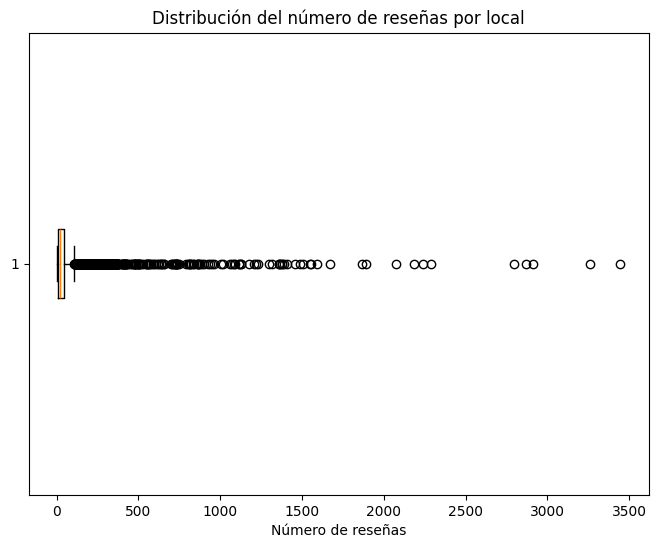

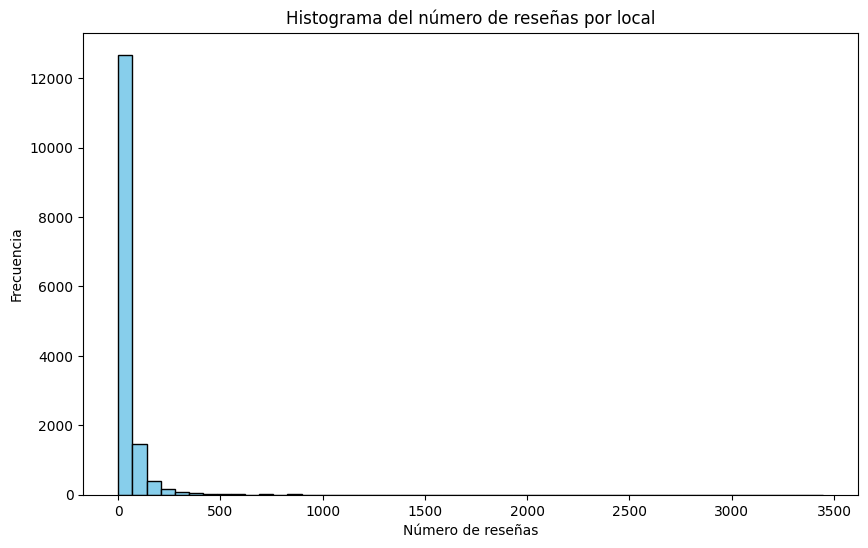

Sugerencia de corte: considerar locales con al menos 8.0 reseñas.


In [8]:
# Filtrar las columnas relevantes
df_filtered = df[['name_business', 'num_of_reviews']].dropna()

# Descripción de los datos para ver la distribución
desc = df_filtered['num_of_reviews'].describe()
print(desc)

# Calcular los percentiles
percentiles = df_filtered['num_of_reviews'].quantile([0.25, 0.5, 0.75, 0.90, 0.95])
print("Percentiles:\n", percentiles)

# Boxplot para visualización de la distribución
plt.figure(figsize=(8,6))
plt.boxplot(df_filtered['num_of_reviews'], vert=False)
plt.title('Distribución del número de reseñas por local')
plt.xlabel('Número de reseñas')
plt.show()

# Histograma para ver la frecuencia de reseñas
plt.figure(figsize=(10,6))
plt.hist(df_filtered['num_of_reviews'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma del número de reseñas por local')
plt.xlabel('Número de reseñas')
plt.ylabel('Frecuencia')
plt.show()

# Sugerencia de corte
# Podríamos tomar un valor en el percentil 25 o 50 como corte
corte_sugerido = percentiles[0.25]
print(f"Sugerencia de corte: considerar locales con al menos {corte_sugerido} reseñas.")